In [1]:
#  Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

# 1. Load & Inspect Data

In [6]:
df = pd.read_excel(r'E:\Courses\Data Analysis\Projects\Stock Company Project\Uber.xlsx')

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500


# 2. Clean & Prepare

In [8]:
# Standardize column names (strip spaces, title-case common OHLCV names)
df.columns = [c.strip().replace(' ', '_') for c in df.columns]

# Ensure expected columns exist
expected = ['Date','Open','High','Low','Close','Volume']
# Try to map case-insensitively
lower_map = {c.lower(): c for c in df.columns}
for col in expected:
    if col not in df.columns:
        # find a close match by lowercase
        key = col.lower()
        if key in lower_map:
            df.rename(columns={lower_map[key]: col}, inplace=True)

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date just in case
df = df.sort_values('Date').reset_index(drop=True)

# Drop duplicates
before = len(df)
df = df.drop_duplicates(subset=['Date'])
after = len(df)
print(f"Deduplicated by Date: removed {before - after} rows")

# Ensure numeric types
for col in ['Open','High','Low','Close','Volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle any remaining missing numeric data by forward-fill then back-fill
df[['Open','High','Low','Close','Volume']] = df[['Open','High','Low','Close','Volume']].ffill().bfill()

df.info()

Deduplicated by Date: removed 0 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       666 non-null    datetime64[ns]
 1   Open       666 non-null    float64       
 2   High       666 non-null    float64       
 3   Low        666 non-null    float64       
 4   Close      666 non-null    float64       
 5   Adj_Close  666 non-null    float64       
 6   Volume     666 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 36.6 KB


# 3. Descriptive Statistics

In [9]:
summary = df[['Open','High','Low','Close','Volume']].describe()
summary

,Open,High,Low,Close,Volume
count,666.000000,666.000000,666.000000,666.000000,6.660000e+02
mean,40.505929,41.284923,39.617884,40.453799,2.391032e+07
std,9.441200,9.512602,9.305134,9.379623,1.679075e+07
min,15.960000,17.799999,13.710000,14.820000,3.380000e+06
25%,32.730000,33.328750,31.973249,32.767499,1.375690e+07
50%,39.865002,40.649999,38.975001,39.914999,1.974835e+07
75%,47.435001,47.947501,46.561250,47.272499,2.907368e+07
max,63.250000,64.050003,60.799999,63.180000,1.863225e+08


# 4.1 Closing Price Over Time

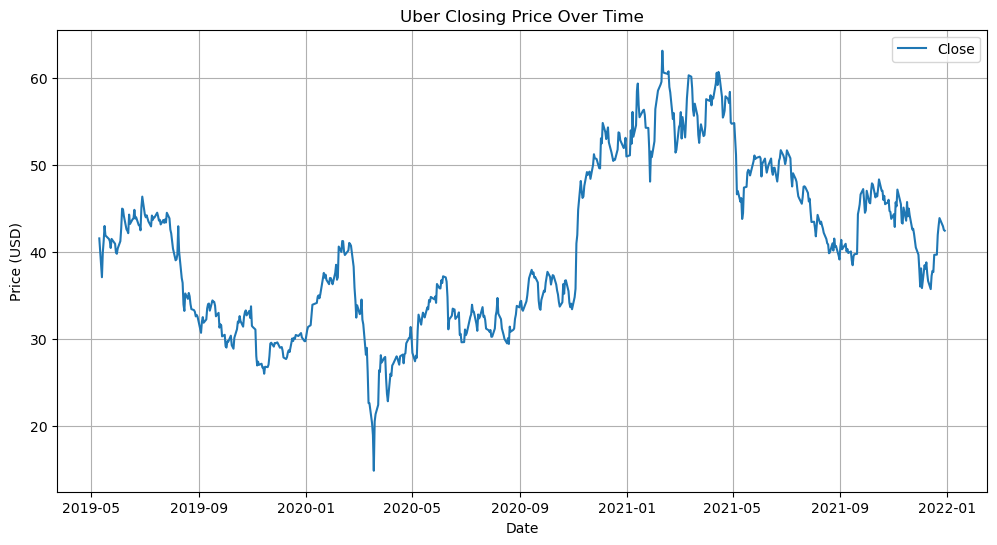

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.title("Uber Closing Price Over Time")
plt.xlabel("Date"); plt.ylabel("Price (USD)")
plt.legend(); plt.grid(True)
plt.show()

# 4.2 Trading Volume Over Time

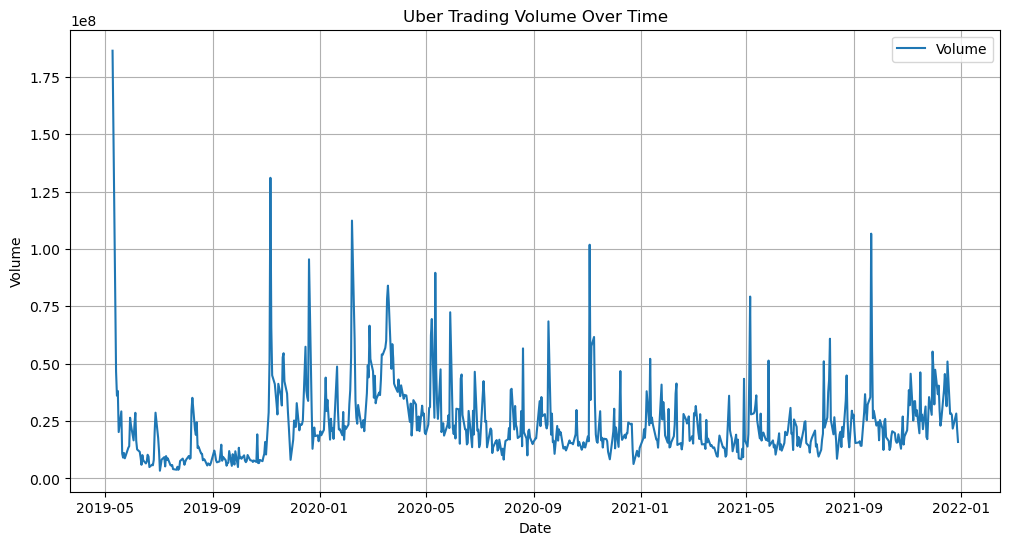

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.title("Uber Trading Volume Over Time")
plt.xlabel("Date"); plt.ylabel("Volume")
plt.legend(); plt.grid(True)
plt.show()

# 4.3 Moving Averages (30 & 90 Days)

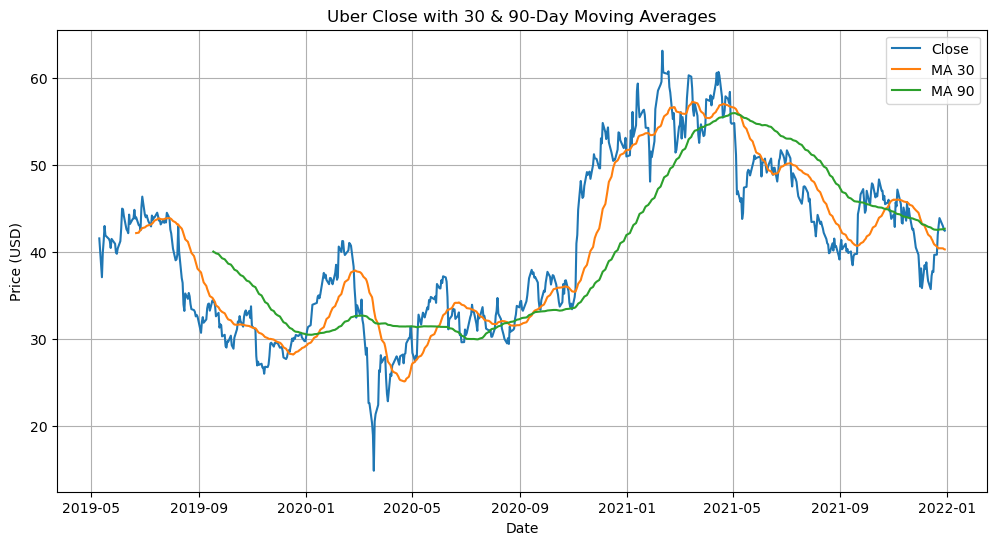

In [16]:
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_90'] = df['Close'].rolling(window=90).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA_30'], label='MA 30')
plt.plot(df['Date'], df['MA_90'], label='MA 90')
plt.title("Uber Close with 30 & 90-Day Moving Averages")
plt.xlabel("Date"); plt.ylabel("Price (USD)")
plt.legend(); plt.grid(True)
plt.show()

# 4.4 Daily High-Low Range

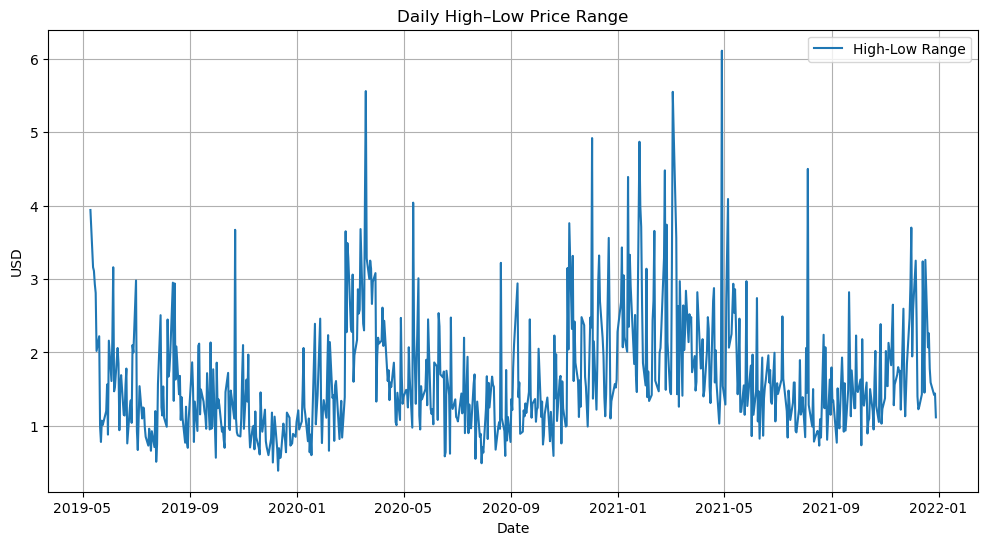

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['High'] - df['Low'], label='High-Low Range')
plt.title("Daily High–Low Price Range")
plt.xlabel("Date"); plt.ylabel("USD")
plt.legend(); plt.grid(True)
plt.show()

# 4.5 Correlation (Open, High, Low, Close, Volume)

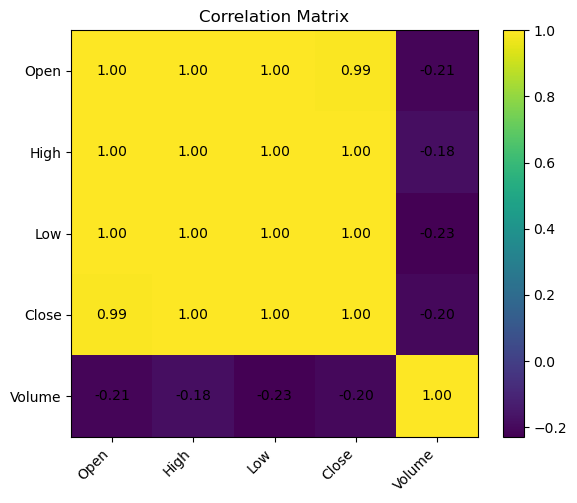

In [14]:
numeric_cols = ['Open','High','Low','Close','Volume']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation Matrix")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
plt.yticks(range(len(numeric_cols)), numeric_cols)
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()

# 5. Growth & Volatility

Start Date: 2019-05-10, Close: $41.57
End Date:   2021-12-29, Close: $42.46
Total Growth over period: 2.14%



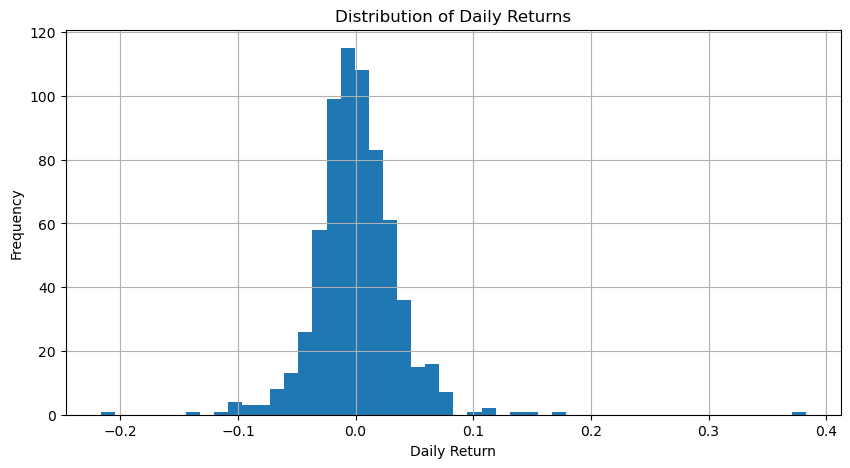

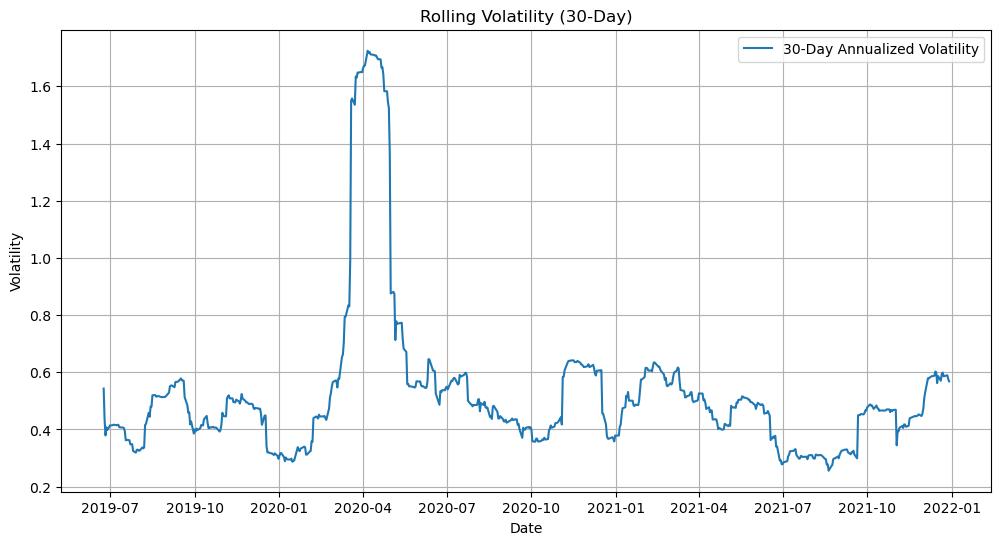

In [15]:
# Daily returns
df['Return'] = df['Close'].pct_change()

# Cumulative growth over the dataset period
start_price = df['Close'].iloc[0]
end_price = df['Close'].iloc[-1]
growth_pct = (end_price / start_price - 1) * 100

print(f"Start Date: {df['Date'].iloc[0].date()}, Close: ${start_price:.2f}")
print(f"End Date:   {df['Date'].iloc[-1].date()}, Close: ${end_price:.2f}")
print(f"Total Growth over period: {growth_pct:.2f}%\n")

# Plot returns distribution (histogram)
plt.figure(figsize=(10,5))
plt.hist(df['Return'].dropna(), bins=50)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return"); plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Rolling volatility (30d std of returns)
df['Volatility_30d'] = df['Return'].rolling(window=30).std() * np.sqrt(252)  # annualized approx

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volatility_30d'], label='30-Day Annualized Volatility')
plt.title("Rolling Volatility (30-Day)")
plt.xlabel("Date"); plt.ylabel("Volatility")
plt.legend(); plt.grid(True)
plt.show()